#Decide on the specific goal of your project:
#a.Predict the next day’s closing price.
#b.Forecast prices for the next week/month.
#c.Predict stock trends (e.g., up/down).
#d.Choose the stock(s) or indices you want to focus on (e.g., Apple, Tesla, S&P 500).


#Collect Raw Data
#Obtain historical stock price data:


In [ ]:
import yfinance as yf

In [ ]:
# Download historical data
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447413  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458557  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355827  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344077  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386254  7.570714  7.571429  7.466429  7.510714  447610800


In [ ]:
print(stock_data.info)

<bound method DataFrame.info of Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2010-01-04    6.447413    7.643214    7.660714    7.585000    7.622500   
2010-01-05    6.458557    7.656429    7.699643    7.616071    7.664286   
2010-01-06    6.355827    7.534643    7.686786    7.526786    7.656429   
2010-01-07    6.344077    7.520714    7.571429    7.466071    7.562500   
2010-01-08    6.386254    7.570714    7.571429    7.466429    7.510714   
...                ...         ...         ...         ...         ...   
2022-12-23  130.487823  131.860001  132.419998  129.639999  130.919998   
2022-12-27  128.676849  130.029999  131.410004  128.720001  131.380005   
2022-12-28  124.728371  126.040001  131.029999  125.870003  129.669998   
2022-12-29  128.261215  129.610001  130.479996  127.730003  127.989998   
2022-1

In [ ]:
print(stock_data.shape)

(3272, 7)


In [ ]:
# Check for missing values
print(stock_data.isnull().sum())

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


In [ ]:
# Fill missing values
stock_data.fillna(method='ffill', inplace=True)

<ipython-input-6-291a38c9ace3>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale close prices
scaler = MinMaxScaler()
stock_data['Scaled_Close'] = scaler.fit_transform(stock_data[['Close']])

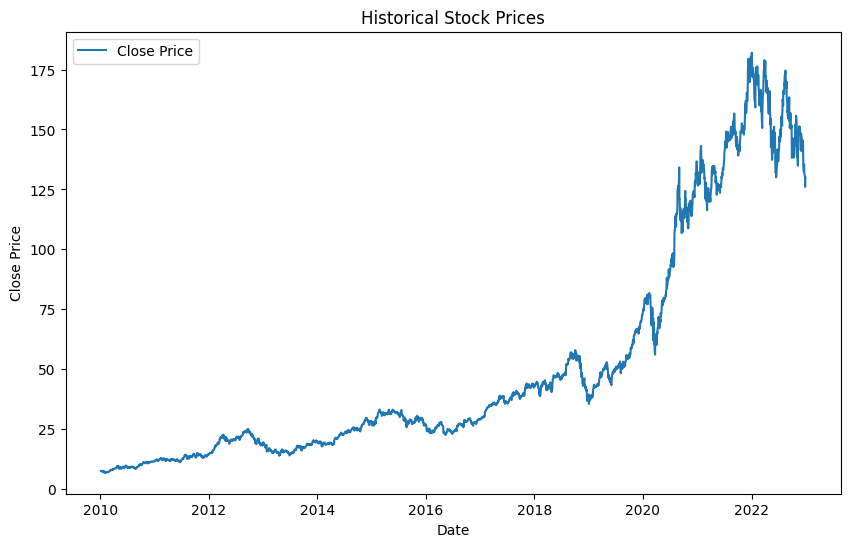

In [ ]:
import matplotlib.pyplot as plt

# Plot historical prices
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
train_data = stock_data[:'2020']
test_data = stock_data['2020':]

In [ ]:
# Separate features and target
X_train = train_data.drop(['Close'], axis=1)
y_train = train_data['Close']

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on test data
predictions = model.predict(X_test)

In [ ]:
# Evaluate
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.16279243240474375


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


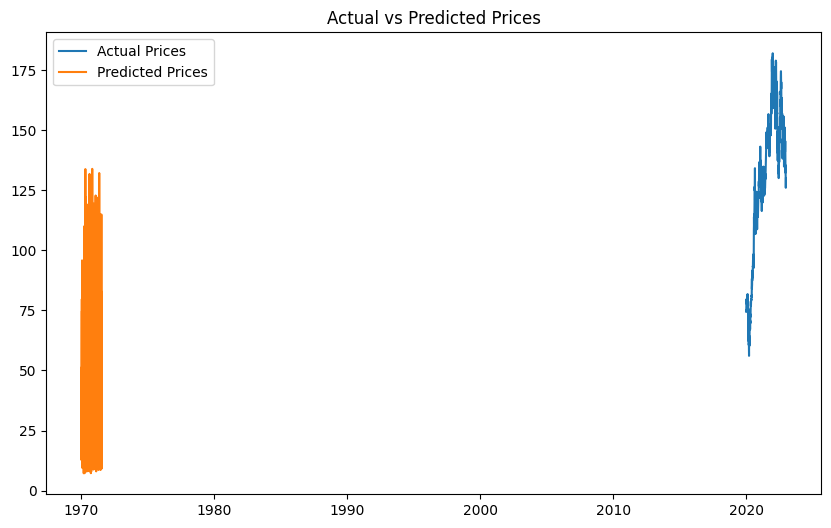

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Close'], label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
# Example: Prepare the last few rows for forecasting
latest_data = stock_data[-30:]  # Use the last 30 days as input for forecasting

In [ ]:
# Ensure you use the same feature engineering steps as for training
X_forecast = latest_data.drop(['Close'], axis=1)

In [ ]:
# Predict future prices
future_predictions = model.predict(X_forecast)

In [ ]:
# Print predictions
print("Future Price Predictions:")
print(future_predictions)

Future Price Predictions:
[134.28919479 134.28919479 134.28919479 134.28919479 134.28919479
 134.28919479 134.28919479 134.28919479 134.28919479 134.28919479
 134.28919479 134.28919479 134.28919479 134.28919479 134.28919479
 134.28919479 134.28919479 134.28919479 134.28919479 134.28919479
 133.90409485 133.03279785 132.73269989 133.81579636 132.85459915
 132.73269989 131.10100281 127.69902527 129.337724   129.66932442]


In [ ]:
# Combine actual and predicted data for visualization
import pandas as pd
import numpy as np
dates = np.append(stock_data.index, [stock_data.index[-1] + pd.Timedelta(days=i) for i in range(1, len(future_predictions) + 1)])
prices = np.append(stock_data['Close'], future_predictions)

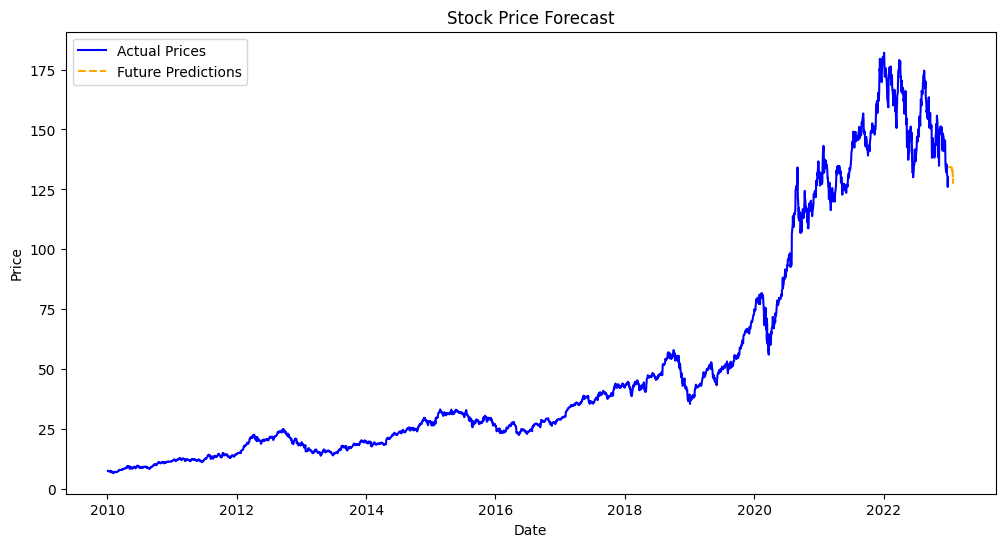

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(dates[-len(future_predictions):], future_predictions, label='Future Predictions', color='orange', linestyle='--')
plt.title("Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Forecasting for Long Horizons
#For longer horizons, use a rolling window approach where predictions are fed back as inputs to predict the next time step.

In [ ]:
# Example: Rolling forecast for the next 7 days
future_steps = 7
rolling_predictions = []

# Use the last row as the starting point for forecasting
last_input = X_forecast.iloc[-1, :].values

for step in range(future_steps):
    next_prediction = model.predict(last_input.reshape(1, -1))[0]
    rolling_predictions.append(next_prediction)

    # Update input by shifting and adding the prediction
    last_input = np.roll(last_input, -1)
    last_input[-1] = next_prediction

print("Rolling Predictions for Next 7 Days:")
print(rolling_predictions)

Rolling Predictions for Next 7 Days:
[129.66932441711427, 131.7726973724365, 121.169723777771, 101.78267459869384, 116.16697326660156, 93.91397481918335, 130.12109855651855]
